# Overview: Lab 1


*   NetworkX
*   Graph Basics
    * l2-network-structure
    * l2-network-representation
    * l3-properties
    * l4-centrality
    * l6-pagerank
* Community Analysis
    * l5-community
    * l5-community-detection




# 1. Graph Basics

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from 
*   https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=lOElDbgvRJOl
*   https://colab.research.google.com/drive/16tqEHKOLUgYvXKx1V3blfYGpQb1_09MG?usp=sharing#scrollTo=Nwwq0nSdmsOL
* https://colab.research.google.com/drive/1mDfmDvzIznQp0THLWDCQNBOw331l3Ks9?usp=sharing#scrollTo=Iee0U8KGURc8

## Setup

In [ ]:
# Install 
# ! pip install networkx

# Import the NetworkX package
import networkx as nx

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [ ]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [ ]:
# Add one node 
G.add_node(0)

In [ ]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=1)

In [ ]:
# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

In [ ]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

In [ ]:
# Loop through all the nodes
# Set data=True will return node attributes
nodes_attributes = G.nodes(data=True)
for node in nodes_attributes:
  print(node)

In [ ]:
# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [ ]:
# Add one edge with edge level attributes
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0,1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [ ]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
])

In [ ]:
# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
edge_attributes = G.edges()
for edge in edge_attributes:
  print(edge)

In [ ]:
# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

## Node Degree and Neighbor

In [ ]:
node_id = 0

# Degree of node 3
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

In [ ]:
# Get neighbor of node 0
node_0_neighbor = G.neighbors(node_id)
for neighbor in node_0_neighbor:
  print("Node {} has neighbor {}".format(node_id, neighbor))

In [ ]:
print(nx.clustering(G))

In [ ]:
print("Node {}'s clustering coefficient".format(node_id), nx.clustering(G, 0))

In [ ]:
print(nx.average_clustering(G))

### Page Rank
- doc : [networkx.algorithms.link_analysis.pagerank_alg.pagerank](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [ ]:
pagerank = nx.pagerank(G)
pagerank

### Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. nx.closeness_centrality(g)
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. nx.betweenness centrality(g, normalized=True)
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. nx.eigenvector_centrality(g)
- *doc* : [Centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)

In [ ]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)
betweenness_centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
betweenness_centrality

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality

## Load Graph Dataset

In [ ]:
# load the karate club graph
G = nx.karate_club_graph()

In [ ]:
import pandas as pd

# load dataset
# [NeurIPS 2020] Data Science for COVID-19 (DS4C)
# https://www.kaggle.com/kimjihoo/coronavirusdataset/version/86
file_path = '/content/PatientInfo.csv'
df = pd.read_csv(file_path, dtype={'patient_id': str, 'infected_by':str})

# drop rows where infected_by == NaN
edgelist = df[~df.infected_by.isna()]
print(edgelist.shape)
edgelist.head()

df.head()

(1346, 14)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
g = nx.DiGraph(
    df.loc[:, ( 'infected_by', 'patient_id')].dropna().values.tolist()
    )

## Visualization

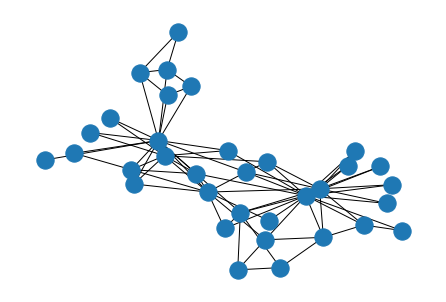

In [ ]:
# Draw the graph
nx.draw(G, with_labels = False)

In [ ]:
# Draw the graph
nx.draw(g, with_labels = False)

In [ ]:
nx.write_graphml_lxml(g, "sample_graph.graphml")

# 2. Community Dectection

Here we use following a Louvain community detection / partition algorithm to partition the graph into different clusters:
* [Louvain algorithm](https://python-louvain.readthedocs.io/en/latest/api.html)


In [ ]:
print(nx.__version__)

In [ ]:
# ! pip install python-louvain
! pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)
print(partition)


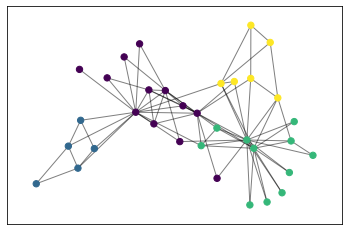

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# 간단 퀴즈
- 오늘 실습내용을 간단히 응용해 봅시다.

setting. karate club 데이터셋을 다시 로드해주세요.

In [ ]:
# load the karate club graph
G = nx.karate_club_graph()

Q1. betweenness_centrality가 두번째로 큰 노드의 아이디를 출력하세요

힌트: dictionary를 value값 기준으로 오름차순 정렬하기


```
sorted(my_dict.items(), key=lambda item: item[1], reverse=False)
```



In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=False)[-2][0]

Q2. degree가 두번째로 큰 노드 아이디를 출력하세요 (방향 고려X)

In [ ]:
nodes_attributes = G.nodes(data=True)
node_idx = [node[0] for node in nodes_attributes]
degree = [(i, G.degree[i]) for i in node_idx]
sorted(degree, key=lambda x : (x[1]), reverse=True)[1][0]

Q3. betweenness_centrality 상위 10개의 노드로 구성된 리스트와 degree 상위 10개의 노드로 구성된 리스트를 비교하고, 해당된 두 리스트에서 겹치는 노드의 수를 적으세요.

예. 
- betweenness_centrality 상위 3개 노드 리스트 = [1, 3, 5]
- degree 상위 3개 노드 리스트 = [1, 2, 5]

답.
2개

In [ ]:
# betweenness_centraility
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)
betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print(betweenness_centrality)
bc_idx = [x[0] for x in betweenness_centrality]
bc_idx

In [ ]:
# degree
degree = sorted(degree, key=lambda x : (x[1]), reverse=True)[:10]
print(degree)
dg_idx = [x[0] for x in degree]
dg_idx

In [ ]:
len(set(bc_idx).intersection(dg_idx))